# 回归算法的评价

误差评价标准

- **MSE**：均方误差 $MSE=\frac{1}{m}\sum_{i=1}^{m}|y_{test}^{(i)}-\hat{y}_{test}^{(i)}|$
- **RMSE**：均方根误差 $RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_{test}^{(i)}-\hat{y}_{test}^{(i)})^{2}}$
    - RMSE 可以放大误差值，所以RMSE更小越有意义
- **MAE**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data[:,5] # 只使用房间数量这个特征

In [6]:
x.shape

(506,)

In [7]:
y = boston.target

In [8]:
y.shape

(506,)

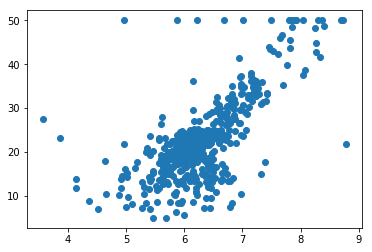

In [9]:
plt.scatter(x, y)
plt.show()

从图中可看出有些数据在50的位置。出现这种情况的原因为：
- 可能是由于测量工具存在上线
- 可能是采用调查问卷的方式，问卷中可能包含“50万以上”这一选项。

在真实数据集中也可能会出现此中情况，我们一般会将此中数据从数据集中删除。

In [10]:
np.max(y)

50.0

In [11]:
x = x[y < 50.0]
y = y[y < 50.0]

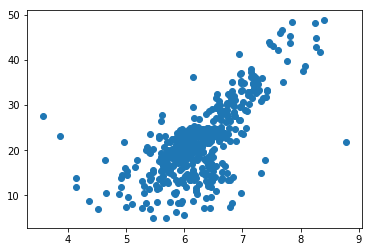

In [12]:
plt.scatter(x, y)
plt.show()

## 使用简单线性回归法

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()
reg.fit(x_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

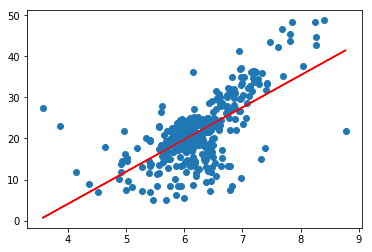

In [17]:
plt.scatter(x_train, y_train)
plt.plot(x_train.reshape(-1,1), reg.predict(x_train.reshape(-1,1)), color='r')
plt.show()

In [18]:
y_predict = reg.predict(x_test.reshape(-1,1))

## MSE

In [19]:
mse_test = np.sum((y_predict - y_test) **2)/len(y_test)
mse_test

28.215949368640807

## RMSE

In [20]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

# 说明误差在5左右

5.311868726600913

## MAE

In [21]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.9489046062737834

## 使用自己实现的MSE RMSE MAE

In [22]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [23]:
mean_squared_error(y_test, y_predict)

28.215949368640807

In [27]:
root_mean_squared_error(y_test, y_predict)

5.311868726600913

In [28]:
mean_absolute_error(y_test, y_predict)

3.9489046062737834

## scikit-learn 中的MSE和MAE

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [25]:
mean_squared_error(y_test, y_predict)

28.215949368640807

In [26]:
mean_absolute_error(y_test, y_predict)

3.9489046062737834